In [51]:
import tensorflow as tf
from tensorflow.keras import models,layers,datasets
import matplotlib.pyplot as plt
import numpy as np

In [52]:
(x_train,y_train),(x_test,y_test) = datasets.fashion_mnist.load_data()

In [53]:
x_train = x_train/255
x_test = x_test/255

In [54]:
x_train_re=x_train.reshape(x_train.shape[0],28,28,1)
x_test_re=x_test.reshape(x_test.shape[0],28,28,1)

In [55]:
cnn = models.Sequential(
    [layers.Conv2D(filters=28,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
     layers.MaxPool2D((2,2)),
     layers.Conv2D(filters=56,kernel_size=(3,3),activation='relu'),
     layers.MaxPool2D((2,2)),
     layers.Flatten(),
     layers.Dense(56,activation='relu'),
     layers.Dense(10,activation='softmax')
    ]
)

In [56]:
cnn.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [57]:
cnn.fit(x_train_re,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.4857 - accuracy: 0.8231
Epoch 2/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.3235 - accuracy: 0.8827
Epoch 3/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2786 - accuracy: 0.8990
Epoch 4/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2483 - accuracy: 0.9085
Epoch 5/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2241 - accuracy: 0.9167
Epoch 6/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2029 - accuracy: 0.9243
Epoch 7/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.1884 - accuracy: 0.9296
Epoch 8/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1739 - accuracy: 0.9348
Epoch 9/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1615 - accuracy: 0.9392
Epoch 10/10
1875/1875 [==============================] - 34s 18m

In [58]:
cnn.evaluate(x_test_re,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.2695 - accuracy: 0.9128


[0.26948776841163635, 0.9128000140190125]

In [67]:
classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

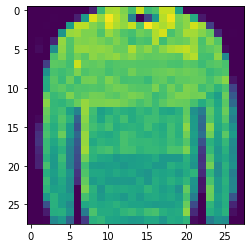

predicted value: Pullover
actual value: Pullover


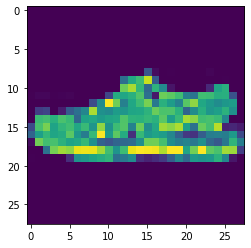

predicted value: Sneaker
actual value: Sandal


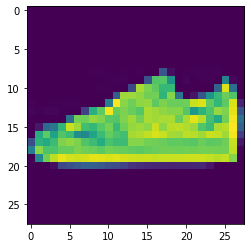

predicted value: Sneaker
actual value: Sneaker


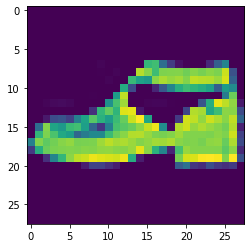

predicted value: Sandal
actual value: Ankle boot


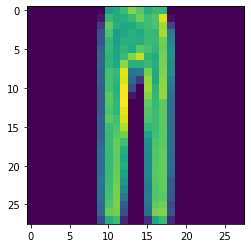

predicted value: Trouser
actual value: Trouser


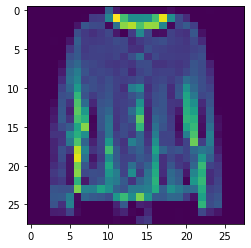

predicted value: Coat
actual value: Coat


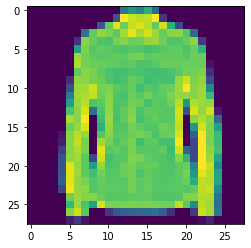

predicted value: Coat
actual value: Shirt


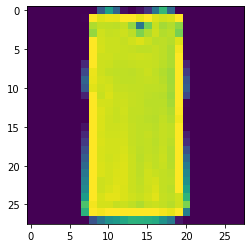

predicted value: T-shirt/Top
actual value: T-shirt/Top


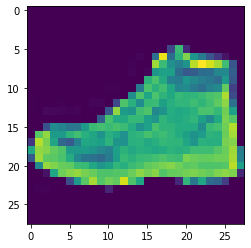

predicted value: Ankle boot
actual value: Ankle boot


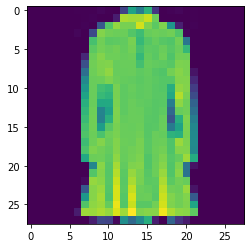

predicted value: Dress
actual value: Dress


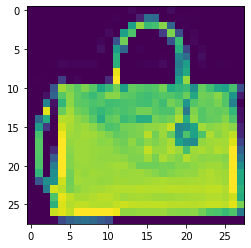

predicted value: Bag
actual value: Bag


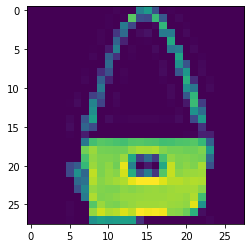

predicted value: Bag
actual value: Bag


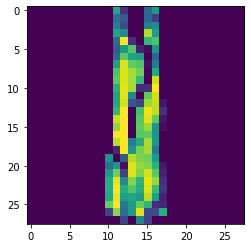

predicted value: Dress
actual value: Dress


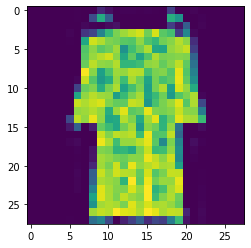

predicted value: Dress
actual value: Dress


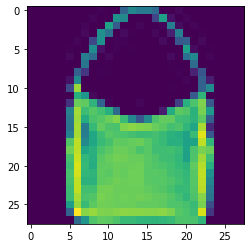

predicted value: Bag
actual value: Bag


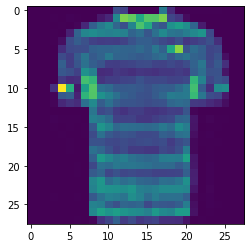

predicted value: T-shirt/Top
actual value: T-shirt/Top


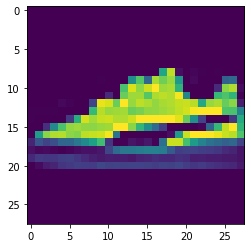

predicted value: Sneaker
actual value: Sneaker


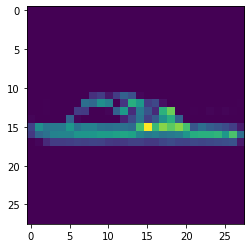

predicted value: Sandal
actual value: Sandal


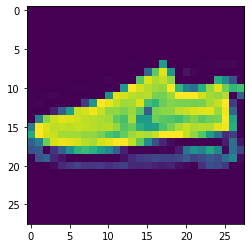

predicted value: Sneaker
actual value: Sneaker


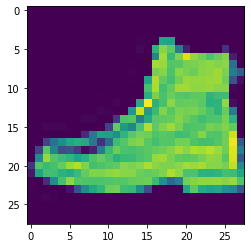

predicted value: Ankle boot
actual value: Ankle boot


In [68]:
for i in range(20,40):
  plt.imshow(x_test[i])
  plt.show()
  print("predicted value:",classes[np.argmax(cnn.predict(x_test_re[i:i+1]))])
  print("actual value:",classes[y_test[i]])

In [70]:
from sklearn.metrics import classification_report
y = cnn.predict(x_test_re)
y_pred = [np.argmax(i) for i in y]
report = classification_report(y_pred,y_test)
print("Classification Report:",report)

Classification Report:               precision    recall  f1-score   support

           0       0.88      0.84      0.86      1043
           1       0.98      1.00      0.99       985
           2       0.88      0.87      0.87      1010
           3       0.92      0.90      0.91      1025
           4       0.91      0.83      0.87      1096
           5       0.97      0.99      0.98       976
           6       0.66      0.80      0.72       817
           7       0.98      0.95      0.97      1028
           8       0.99      0.96      0.98      1025
           9       0.97      0.97      0.97       995

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000

